### **Comparison with 2020 data**

The 2022 bioimage analysis survey data was compared with the data from 2020.

In [51]:
#importing the necessary modules
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
import kaleido
from textwrap import wrap
from utils import * 


In [3]:
#reading data from another notebook 
%store -r data

#### Role

In [4]:
# pie chart for the roles of the survey participants 
role_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\Which_of_the_following_roles_best_describes_you.txt')
role_2021= role_2021.rename(columns={'0':'role'})
role_2021['category'] = role_2021['role'].apply(lambda x: 'Other' if x not in ['Postdoctoral fellow','Undergraduate/Graduate student', 'Principal investigator', 'Facility staff', 'Research scientist', 'Image analyst', 'Facility director', 'Clinician'] else x)
role_2021['category_1'] = role_2021['category'].apply(lambda x: 'Image/data analyst' if x=='Image analyst' else x)



In [5]:
#combined figure
role_2021_2022 = go.Figure()

role_2021_2022.add_traces(go.Bar(name='2020', x=role_2021["category_1"].value_counts().index, y=role_2021["category_1"].value_counts().values, orientation='v', text=role_2021["category_1"].value_counts().values))
role_2021_2022.add_traces(go.Bar(name='2022', x=data['Role'].value_counts().index, y=data['Role'].value_counts().values, orientation='v', text=data['Role'].value_counts().values))
role_2021_2022.update_layout(width=600, height=500, title='Role', title_x=0.5, title_y=0.85, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
role_2021_2022.update_yaxes(categoryorder = 'total ascending')


#### Location

In [6]:
#location 
location_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\Where_do_you_currently_primarily_work.txt')
location_2021= location_2021.rename(columns={'0':'location'})

#combined figure
loc = go.Figure()

loc.add_traces(go.Bar(name='2020', x=location_2021['location'].value_counts().index, y=location_2021['location'].value_counts().values, text=location_2021['location'].value_counts().values))
loc.add_traces(go.Bar(name='2022', x=data['Location'].value_counts().index, y=data['Location'].value_counts().values, text=data['Location'].value_counts().values))
loc.update_layout(width=500, height=500, title='Location', title_x=0.5, title_y=0.85, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))


#### Work type

In [7]:
# work type_2021
work_type_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_would_you_describe_your_work.txt')
work_type_2021= work_type_2021.rename(columns={'0':'work_type'})
work_type_2021.loc[work_type_2021["work_type"] < 3, "Work type" ] = "Imaging"
work_type_2021.loc[(work_type_2021["work_type"] >= 3) & (work_type_2021["work_type"] < 5), "Work type"] = "Balanced"
work_type_2021.loc[work_type_2021["work_type"] >= 5, "Work type"] = "Analyst"
work_type_counts_2021 = work_type_2021["Work type"].value_counts()
work_type_counts_2021 
#knowledge in computational skills_2021 
comp_skill_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_would_you_rate_your_computational_skills.txt')
comp_skill_2021= comp_skill_2021.rename(columns={'0':'comp_skill'})

comp_skill_2021.loc[comp_skill_2021["comp_skill"] < 3, "Knowledge of computational skills"] = "Low skill"
comp_skill_2021.loc[(comp_skill_2021["comp_skill"] >= 3) & (comp_skill_2021["comp_skill"] < 5), "Knowledge of computational skills"] = "Medium skill"
comp_skill_2021.loc[comp_skill_2021["comp_skill"] >= 5, "Knowledge of computational skills"] = "High skill"
computational_knowledge_2021 = comp_skill_2021["Knowledge of computational skills"].value_counts()


In [8]:
%store -r work_type_counts
# comparing 2021 and 2022 work type
work_21_22 = go.Figure()

work_21_22.add_trace(go.Bar(name=2020, x=work_type_counts_2021.index, y=work_type_counts_2021.values, text=work_type_counts_2021.values))
work_21_22.add_trace(go.Bar(name=2022, x=work_type_counts.index , y=work_type_counts.values, text=work_type_counts.values))

work_21_22.update_layout(title = 'Work type', title_x=0.5, width=400, height=400, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
# comparing 2021 and 2022 work type and comp skill in percentage
from plotly.subplots import make_subplots

work_21_22_percent= go.Figure()
work_21_22_percent = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

work_21_22_percent.add_trace(go.Pie(labels=work_type_counts_2021.index, values=work_type_counts_2021.values), 1,1)
work_21_22_percent.add_trace(go.Pie(labels = work_type_counts.index , values=work_type_counts.values),1,2)
work_21_22_percent.update_traces(hole=.4, hoverinfo="label+percent+name")
work_21_22_percent.update_layout(title_x=0.5, title_y=0.80, title_text="Work type", annotations=[dict(text='2020', x=0.18, y=0.5, font_size=16, showarrow=False),dict(text='2022', x=0.82, y=0.5, font_size=16, showarrow=False)])
work_21_22_percent.update_layout(font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
work_21_22_percent.update_layout(width=600, height=350)


#### Computational knowledge

In [9]:
%store -r computational_knowledge
# comparing 2021 and 2022 comp skill
comp_skill_21_22 = go.Figure()

comp_skill_21_22.add_trace(go.Bar(name=2020, x= computational_knowledge_2021.index, y=computational_knowledge_2021.values, text=computational_knowledge_2021.values))
comp_skill_21_22.add_trace(go.Bar(name=2022, x=computational_knowledge.index , y=computational_knowledge.values, text=computational_knowledge.values))

comp_skill_21_22.update_layout(title = 'Computational knowledge', title_x=0.5, width=400, height=400, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))


In [10]:
# comfort in developing new computational skills 
comf_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_would_you_rate_your_comfort_in_developing_new_computational_skills.txt')
comf_2021= comf_2021.rename(columns={'0':'comfort'})

# Comfort in developing new computational skills
comf_2021.loc[comf_2021["comfort"] < 3, 'Comfort'] = 'Low comfort'
comf_2021.loc[(comf_2021['comfort'] >= 3) & (comf_2021['comfort'] < 5), 'Comfort'] = "Medium comfort"
comf_2021.loc[comf_2021['comfort'] >= 5 , 'Comfort'] = "High comfort"


#Comparing comfort in developing new computational skills
comf_21_22 = go.Figure()

comf_21_22.add_trace(go.Bar(name=2020, x= comf_2021['Comfort'].value_counts().index, y=comf_2021['Comfort'].value_counts().values, text=comf_2021['Comfort'].value_counts().values))
comf_21_22.add_trace(go.Bar(name=2022, x=data['Comfort'].value_counts().index, y=data['Comfort'].value_counts().values, text=data['Comfort'].value_counts().values))

comf_21_22.update_layout(title = 'Comfort in developing <br> new computational skills', title_x=0.5, width=400, height=400, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))


KeyError: 'Comfort'

#### Approach to image analysis problems

In [11]:
#solving image analysis problems- 2020

sol_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_do_you_generally_go_about_solving_an_image_analysis_problem_Check_the_approaches_you_use_the_most.txt')
sol_2021 = sol_2021.rename(columns={'0':'solution'})


In [12]:
def count_other(series, list_to_include=[]):
    list = sol_2021['solution'].dropna().tolist()
    list_split = [i.split(',') for i in list]
    list_flat = [i for innerlist in list_split for i in innerlist]
    list_wo_spaces = [i.lstrip() for i in list_flat] #removing the leading spaces in the string 
    list_counts = dict((x,list_wo_spaces.count(x)) for x in set(list_wo_spaces))

    filtered_dict = {k:v for k,v in list_counts.items() if k in list_to_include} 
    filtered_dict_other = {k:v for k,v in list_counts.items() if k not in list_to_include}  # filtering out the 'Other'category
    df = pd.DataFrame.from_dict(filtered_dict, orient='index')
    other_df = pd.DataFrame.from_dict(filtered_dict_other, orient ='index')
    df = df.reset_index()
    df = df.rename(columns={0:'counts'})

    #Other category is added  as a separate row along with the sum 
    other = {'index':'Other', 'counts':other_df[0].sum()}
    df = df.append(other, ignore_index=True)
    return df


In [13]:
sol_2020_df = count_other(sol_2021['solution'], list_to_include =['Sit down with a tool I know and start playing with the data', 'Ask a friend or colleague to help me', 'Ask on forum.image.sc', 'Look up solutions generally on the internet (Google)',
'Look up solutions on a particular website (please list below)', 'Look up solutions in the scientific literature'])

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_44428\3258138431.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [14]:
def barchart_df(series):
    #creating the dcitionary of the unique values with the counts 
    list = series.dropna(how='all').tolist()
    list_split = [re.split(r',\s*(?![^()]*\))', i) for i in list]   #splitting the list based on comma but not the ones inside the bracket 
    list_flat = [i for innerlist in list_split for i in innerlist]  #converting a nested list to a flat list 
    list_wo_spaces = [i.lstrip() for i in list_flat] #removing the leading spaces in the string 
    dict_count = dict((x,list_wo_spaces.count(x)) for x in set(list_wo_spaces)) # creating a dictionary with counts of each unique values 
    

    #creating a dataframe from the modified dictionary 
    df = pd.DataFrame.from_dict(dict_count, orient='index')
    df = df.rename(columns={0:'counts'})
    return df 

In [15]:
sol_2022_df = barchart_df(data["Approach to solutions"])

In [16]:

#Comparing - approaches to image analysis problems 
sol_21_22 = go.Figure()

sol_21_22.add_trace(go.Bar(name=2020, y= sol_2020_df['index'], x=sol_2020_df['counts'], text=sol_2020_df['counts'], orientation='h'))
sol_21_22.add_trace(go.Bar(name=2022, y=sol_2022_df.index, x=sol_2022_df['counts'], text=sol_2022_df['counts'], orientation='h'))
sol_21_22.update_layout(title = 'Approaches to image analysis problems', title_x=0.5, width=700, height=400, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
sol_21_22.update_yaxes(categoryorder='total ascending')


#### Notifications

In [17]:
#Notifications of the future workshops
notifications_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_would_you_prefer_to_be_notified_about_image_analysis_workshops_sessions_or_conferences_being_planned.txt')
notifications_2021 = notifications_2021.rename(columns={'0':'Notifications'})
notifications_2021['notify'] = notifications_2021['Notifications'].apply(lambda x: 'Other' if x not in ['Email list', 'Postings on image.sc forum or microforum', 'Twitter', 'My local microscopy facility', 'Word of mouth'] else x)


In [18]:
#reading data from other notebook
%store -r counts_notifications

#Comparison - 2020 ad 2022
not_21_22 = go.Figure()

not_21_22.add_trace(go.Bar(name='2020', y=notifications_2021['notify'].value_counts().index, x=notifications_2021['notify'].value_counts().values, orientation='h', text=notifications_2021['notify'].value_counts().values))
not_21_22.add_trace(go.Bar(name='2022', y=counts_notifications['notify'].value_counts().index, x=counts_notifications['notify'].value_counts().values, orientation='h', text=counts_notifications['notify'].value_counts().values))
not_21_22.update_layout(title='Notifications for the future image analysis workshops', title_x=0.5, title_y=0.9, width=600, height=500)
not_21_22.update_yaxes(categoryorder='total ascending')
not_21_22.update_layout(font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))


#### Most used image analysis tools 

In [19]:
#most used image analysis tools
most_used_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_image_analysis_tools_do_you_use_the_most.txt')
most_used_2021 = most_used_2021.rename(columns={'0':'most_used_tools'})


In [20]:
def tools_count_df(series):
#creating the dcitionary of the unique values with the counts 
    list = series.dropna(how='all').tolist()
    list_split = [re.split(r',\s*(?![^()]*\))', i) for i in list]   #splitting the list based on comma but not the ones inside the bracket 
    list_flat = [i for innerlist in list_split for i in innerlist]  #converting a nested list to a flat list 
    list_wo_spaces = [i.rstrip() for i in list_flat] #removing the leading spaces in the string 
    dict_count = dict((x,list_wo_spaces.count(x)) for x in set(list_wo_spaces)) # creating a dictionary with counts of each unique values 
   
    #shortening the index to avoid having lengthy axis labels
    final_key=[]
    for i in dict_count.keys():
        new_key = i.split('(')
        new_key = [new_key[0]]
        new_key = [i.rstrip() for i in new_key]
        final_key = final_key + new_key
        
    #changing the key values in a dictionary 
    list = dict_count.values()
    final_dict = dict(zip(final_key, list))
    
    #creating a dataframe from the modified dictionary 
    tools_df = pd.DataFrame.from_dict(final_dict, orient='index')
    tools_df = tools_df.rename(columns={0:'counts'})
    tools_df = tools_df.drop('None')
    return tools_df

In [21]:
most_2022_df = tools_count_df(data['Most used image analysis tools'])

In [22]:

#using the following instead of teh value counts since the legends couldn't be shortened 
most_used_2021['Commercial software that comes with my microscope'] = most_used_2021['most_used_tools'].apply(lambda x:True if x == 'Commercial software that comes with my microscope (ie Columbus, Elements, Softworx, etc)' else False)
most_used_2021['Other commercial software'] = most_used_2021['most_used_tools'].apply(lambda x: True if x == 'Other commercial software (Imaris, Volocity, etc)' else False)
most_used_2021['Open source point-and-click software'] = most_used_2021['most_used_tools'].apply(lambda x: True if x == 'Open source point-and-click software (ImageJ, FIJI, Icy, CellProfiler, etc)'else False)
most_used_2021['Computational libraries and scripts'] = most_used_2021['most_used_tools'].apply(lambda x:True if x == 'Computational libraries and scripts (scikit-image, MATLAB, etc)' else False)
most_used_2021['None'] = most_used_2021['most_used_tools'].apply(lambda x:True if x == 'None' else False)
most_used_2021_subset = most_used_2021.iloc[:, 1:6]
most_used_2021_subset

#creating a subset
most_used_2021_df = pd.DataFrame(most_used_2021_subset.sum())
most_used_2021_df = most_used_2021_df.reset_index()
most_used_2021_df = most_used_2021_df.rename(columns={'index':'tools', 0 :'counts'})
most_used_2021_df

#comparing with 2022
most_used_21_22 = go.Figure()

most_used_21_22.add_trace(go.Bar(name='2020', x= most_used_2021_df['counts'], y=most_used_2021_df['tools'], orientation='h', text=most_used_2021_df['counts']))
most_used_21_22.add_trace(go.Bar(name='2022', x=most_2022_df['counts'], y=most_2022_df.index, orientation='h', text=most_2022_df['counts']))
most_used_21_22.update_layout(title = 'Most used image analysis tools', title_x=0.5,title_y = 0.95, width=700, height=400)
most_used_21_22.update_layout(font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
most_used_21_22.update_yaxes(categoryorder='total ascending')

#### Commonly used image analysis tools

In [23]:
com_tool_df = tools_count_df(data['Commonly used image analysis tools'])

In [24]:
#What image analysis tools have you used before?
com_tool_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_image_analysis_tools_have_you_used_before_check_all_that_apply.txt')
com_tool_2021 = com_tool_2021.rename(columns={'0':'com_used_tools'})

#Commonly used image analysis tools
com_tool_2021['Commonly used image analysis tools'] = com_tool_2021['com_used_tools'].astype(str) # this is done to ignore the Nan for analysis 
com_tool_2021["Commercial software that comes with my microscope"] = com_tool_2021['com_used_tools'].apply(lambda x: True if 'Columbus' in x else False)
com_tool_2021["Other commercial software"] = com_tool_2021['com_used_tools'].apply(lambda x: True if 'Imaris' in x else False)
com_tool_2021["Open source point-and-click software"] = com_tool_2021["com_used_tools"].apply(lambda x: True if 'FIJI' in x else False)
com_tool_2021["Computational libraries and scripts"] = com_tool_2021["com_used_tools"].apply(lambda x: True if 'MATLAB' in x else False)
com_tool_2021["Tools_none"] = com_tool_2021["com_used_tools"].apply(lambda x: True if 'None' in x else False)

# creating a subset of the dataframe
com_tool_2021_subset = com_tool_2021.iloc[:, 2:7]
com_tool_2021_df = pd.DataFrame(com_tool_2021_subset.sum())
com_tool_2021_df = com_tool_2021_df.reset_index()
com_tool_2021_df = com_tool_2021_df.rename(columns={'index':'tools', 0:'counts'})
com_tool_2021_df
# comparison of the commonly used image analysis tools - 2020 and 2022
com_tool_21_22 = go.Figure()

com_tool_21_22.add_trace(go.Bar(name='2020', y=com_tool_2021_df['tools'], x=com_tool_2021_df['counts'], text=com_tool_2021_df['counts'], orientation='h'))
com_tool_21_22.add_trace(go.Bar(name='2022', x=com_tool_df['counts'], y=com_tool_df.index, text=com_tool_df['counts'], orientation='h'))

com_tool_21_22.update_layout(width=700, height=400, title="Commonly used image analysis tools", title_x=0.5, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
com_tool_21_22.update_yaxes(categoryorder = 'total ascending')


#### Kinds of images analyzed

In [25]:
#what type of images do you commonly want to analyze?

# Brightfield manually acquired-2020
BF_manual_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Brightfield_DIC_phase-contrast_of_cells_or_organisms_from_manually_selected_fields.txt')
BF_manual_2020 = BF_manual_2020.rename(columns={'0':'Brightfield/DIC/phase-contrast manually acquired'})

# Brightfield automated-2020
BF_automated_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Brightfield_DIC_phase-contrast_of_cells_or_organisms_from_an_automated_microscope.txt')
BF_automated_2020 = BF_automated_2020.rename(columns={'0':'Brightfield/DIC/phase-contrast automated'})

#fluorescent manual -2020
fluorescent_manual_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Fluorescent_images_of_cells_organisms_from_manually_selected_fields.txt')
fluorescent_manual_2020 = fluorescent_manual_2020.rename(columns={'0':'Fluorescent images manually acquired'})

#fluorescent automated -2020
fluorescent_automated_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Fluorescent_images_of_cells_organisms_from_an_automated_microscope.txt')
fluorescent_automated_2020 = fluorescent_automated_2020.rename(columns={'0':'Fluorescent images automated'})

#histology in tissue sections-2020
histology_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Histologically_stained_tissue_sections.txt')
histology_2020 = histology_2020.rename(columns={'0':'Histological tissue sections'})

#fluorescence in tissue sections-2020
flo_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Fluorescently_stained_tissue_sections.txt')
flo_2020 = flo_2020.rename(columns={'0':'Fluorescence in tissue sections'})

#Electron microscopy -2020
elec_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Electron_microscopy.txt')
elec_2020 = elec_2020.rename(columns={'0':'Electron microscopy'})

#Imaging mass spectrometry - 2020
ms_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Imaging_mass_spectrometry.txt')
ms_2020 = ms_2020.rename(columns={'0':'Imaging mass spectrometry'})

#Imaging flow cytometry - 2020
fc_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Imaging_flow_cytometry.txt')
fc_2020 = fc_2020.rename(columns={'0':'Imaging flow cytometry'})

#super resolution - 2020
sr_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Superresolution_PALM_STORM.txt')
sr_2020 = sr_2020.rename(columns={'0':'Superresolution (PALM/STORM)'})

#FLIM -2020
flim_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Autofluorescence_imaging_ie_FLIM.txt')
flim_2020 = flim_2020.rename(columns={'0':'Autofluorescence imaging (ie FLIM)'})

# combining all the dataframes - modality - 2020
modality_type_combined_2020 = pd.concat([BF_manual_2020,BF_automated_2020,fluorescent_manual_2020,fluorescent_automated_2020,histology_2020,
flo_2020,elec_2020,ms_2020,fc_2020,sr_2020,flim_2020], axis=1)


In [26]:
stacked_barchart(modality_type_combined_2020, title='Kinds_of_images_analyzed_2020', order_of_stacks=['2D', '2D+time','3D(<3000x3000x100)', '3D+time', '3Dlargevolume+time', '3D(SPIM/largevolume)'])

#### Topics of interest - comparison

In [27]:
# Topics of interest for the tutorials - 2020 and 2022
int_2020_theory = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_interested_are_you_in_learning_more_about_the_following_topics_Image_analysis_theory_.txt')
int_2020_theory = int_2020_theory.rename(columns={'0':'theory'})
int_2020_theory = int_2020_theory['theory'].value_counts().to_frame()

int_2020_practices = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_interested_are_you_in_learning_more_about_the_following_topics_General_image_analysis_practices.txt')
int_2020_practices = int_2020_practices.rename(columns={'0':'practices'})
int_2020_practices = int_2020_practices['practices'].value_counts().to_frame()

int_2020_par_field = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_interested_are_you_in_learning_more_about_the_following_topics_Image_analysis_practices_particular_to_my_field.txt')
int_2020_par_field = int_2020_par_field.rename(columns={'0':'Practices related to particular field'})
int_2020_par_field = int_2020_par_field['Practices related to particular field'].value_counts().to_frame()

int_2020_spc_tool = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_interested_are_you_in_learning_more_about_the_following_topics_Learning_to_use_a_particular_software_tool.txt')
int_2020_spc_tool = int_2020_spc_tool.rename(columns={'0':'Specific software tool'})
int_2020_spc_tool = int_2020_spc_tool['Specific software tool'].value_counts().to_frame()

int_2020_DL = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_interested_are_you_in_learning_more_about_the_following_topics_Deep_learning_as_applied_to_image_analysis.txt')
int_2020_DL = int_2020_DL.rename(columns={'0':'Deep learning for image analysis'})
int_2020_DL = int_2020_DL['Deep learning for image analysis'].value_counts().to_frame()
int_2020_com = pd.concat([int_2020_theory, int_2020_practices, int_2020_par_field, int_2020_spc_tool, int_2020_DL], axis=1)
int_2020_com = int_2020_com.rename(columns={'theory':'Image analysis theory', 'practices':'Image analysis practices'})
int_2020_com = int_2020_com.reset_index()
int_2020_com = int_2020_com.rename(columns={'index':'interest'})

#changing the value of the row since the it is 'A little interested' in 2020 and 'somewhat interested' in 2022
int_2020_com.loc[2,'interest'] = 'Somewhat interested'

#getting the percentage 
int_2020_com['percent_theory'] = (int_2020_com['Image analysis theory']/int_2020_com['Image analysis theory'].sum()) *100
int_2020_com['percent_practices'] = (int_2020_com['Image analysis practices']/int_2020_com['Image analysis practices'].sum()) *100
int_2020_com['percent_particular'] = (int_2020_com['Practices related to particular field']/int_2020_com['Practices related to particular field'].sum()) *100
int_2020_com['percent_sptool'] = (int_2020_com['Specific software tool']/int_2020_com['Specific software tool'].sum()) *100
int_2020_com['percent_DL'] = (int_2020_com['Deep learning for image analysis']/int_2020_com['Deep learning for image analysis'].sum()) *100

#rounding up the decimals
int_2020_com['percent_theory']= int_2020_com['percent_theory'].round(decimals=1)
int_2020_com['percent_practices'] = int_2020_com['percent_practices'].round(decimals=1)
int_2020_com['percent_particular'] = int_2020_com['percent_particular'].round(decimals=1)
int_2020_com['percent_sptool'] = int_2020_com['percent_sptool'].round(decimals=1)
int_2020_com['percent_DL'] = int_2020_com['percent_DL'].round(decimals=1)
int_2020_com


,interest,Image analysis theory,Image analysis practices,Practices related to particular field,Specific software tool,Deep learning for image analysis,percent_theory,percent_practices,percent_particular,percent_sptool,percent_DL
0,Very interested,182,248,360,238,234,37.6,51.2,74.4,49.2,48.3
1,Moderately interested,147,162,94,149,138,30.4,33.5,19.4,30.8,28.5
2,Somewhat interested,126,68,28,83,88,26.0,14.0,5.8,17.1,18.2
3,Not at all interested,29,6,2,14,24,6.0,1.2,0.4,2.9,5.0


In [28]:
trial_radar = data["Image analysis theory"].value_counts().to_frame()
trial_radar_1=data["Image analysis practices"].value_counts().to_frame()
trial_radar_2=data["Topics related to sub discipline"].value_counts().to_frame()
trial_radar_3=data["Specific software tool"].value_counts().to_frame()
trial_radar_4=data["Deep learning for image analysis"].value_counts().to_frame()
trial_radar_5=data["Analyzing large images"].value_counts().to_frame()
trial_radar_6=data["Visualization of results"].value_counts().to_frame()

#concatenating all the related columns for topics of interest
trial = pd.concat([trial_radar, trial_radar_1, trial_radar_2, trial_radar_3, trial_radar_4, trial_radar_5, trial_radar_6], axis=1)

#Reseting the index so that the column can be renamed
trial =trial.reset_index()
trial = trial.rename(columns={'index':'interest'})

In [29]:
#editing the 2022 column 
trial_subset = trial.iloc[:, 0:6]
trial_subset = trial_subset.rename(columns={'Interes in topics Image analysis theory':'Image analysis theory', 'Interest in topics Image analysis practices':'Image analysis practices','Interest in topics related to sub discipline':'Practices related to particular field','Interest in topics Specific software tool':'Specific software tool', 'Interest in topics Deep learning for image analysis':'Deep learning for image analysis'})
trial_subset

#getting the percentage 
trial_subset['percent_theory'] = (trial_subset['Image analysis theory']/trial_subset['Image analysis theory'].sum()) *100
trial_subset['percent_practices'] = (trial_subset['Image analysis practices']/trial_subset['Image analysis practices'].sum()) *100
trial_subset['percent_particular'] = (trial_subset['Topics related to sub discipline']/trial_subset['Topics related to sub discipline'].sum()) *100
trial_subset['percent_sptool'] = (trial_subset['Specific software tool']/trial_subset['Specific software tool'].sum()) *100
trial_subset['percent_DL'] = (trial_subset['Deep learning for image analysis']/trial_subset['Deep learning for image analysis'].sum()) *100

#rounding up the decimals
trial_subset['percent_theory']= trial_subset['percent_theory'].round(decimals=1)
trial_subset['percent_practices'] = trial_subset['percent_practices'].round(decimals=1)
trial_subset['percent_particular'] = trial_subset['percent_particular'].round(decimals=1)
trial_subset['percent_sptool'] = trial_subset['percent_sptool'].round(decimals=1)
trial_subset['percent_DL'] = trial_subset['percent_DL'].round(decimals=1)
trial_subset


,interest,Image analysis theory,Image analysis practices,Topics related to sub discipline,Specific software tool,Deep learning for image analysis,percent_theory,percent_practices,percent_particular,percent_sptool,percent_DL
0,Very interested,157,227,341,223,207,31.8,46.0,69.2,45.2,42.0
1,Moderately interested,150,188,109,171,143,30.4,38.1,22.1,34.7,29.0
2,Somewhat interested,147,69,36,82,114,29.8,14.0,7.3,16.6,23.1
3,Not at all interested,39,9,7,17,29,7.9,1.8,1.4,3.4,5.9


In [30]:
#comparison - topics of interest for the tutorials 
int_tut_20_22 = go.Figure()

int_tut_20_22 = make_subplots(rows=4, cols=2,shared_yaxes='all', subplot_titles=('Image analysis theory', 'Image analysis practices', 'Image analysis practices <br> related to particular field', 'Specific software tool', 'Deep learning for image analysis'))


int_tut_20_22.add_trace(go.Bar(name="2020", x=int_2020_com['interest'], y=int_2020_com['percent_theory'], text=int_2020_com['percent_theory'],marker_color= '#636EFA', legendgroup='group1', yaxis='y1'), row=1, col=1)
int_tut_20_22.add_trace(go.Bar(name="2022", x=trial_subset['interest'], y=trial_subset['percent_theory'], text=trial_subset['percent_theory'],marker_color= 'rgba(255, 0, 0, 0.6)', legendgroup='group1'), row=1, col=1)

int_tut_20_22.add_trace(go.Bar(x=int_2020_com['interest'], y=int_2020_com['percent_practices'], text=int_2020_com['percent_practices'],marker_color= '#636EFA', showlegend=False),row=1, col=2)
int_tut_20_22.add_trace(go.Bar(x=trial_subset['interest'], y=trial_subset['percent_practices'], text=trial_subset['percent_practices'],marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),row=1, col=2)

int_tut_20_22.add_trace(go.Bar(x=int_2020_com['interest'], y=int_2020_com['percent_particular'], text=int_2020_com['percent_particular'],marker_color= '#636EFA',showlegend=False, yaxis='y3'),row=2, col=1)
int_tut_20_22.add_trace(go.Bar(x=trial_subset['interest'], y=trial_subset['percent_particular'], text=trial_subset['percent_particular'],marker_color= 'rgba(255, 0, 0, 0.6)',showlegend=False),row=2, col=1)

int_tut_20_22.add_trace(go.Bar(x=int_2020_com['interest'], y=int_2020_com['percent_sptool'], text=int_2020_com['percent_sptool'],marker_color= '#636EFA',showlegend=False),row=2, col=2)
int_tut_20_22.add_trace(go.Bar(x=trial_subset['interest'], y=trial_subset['percent_sptool'], text=trial_subset['percent_sptool'],marker_color= 'rgba(255, 0, 0, 0.6)',showlegend=False),row=2, col=2)

int_tut_20_22.add_trace(go.Bar(x=int_2020_com['interest'], y=int_2020_com['percent_DL'], text=int_2020_com['percent_DL'],marker_color= '#636EFA',showlegend=False, yaxis='y5'),row=3, col=1)
int_tut_20_22.add_trace(go.Bar(x=trial_subset['interest'], y=trial_subset['percent_DL'], text=trial_subset['percent_DL'],marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),row=3, col=1)


int_tut_20_22.update_layout(width=650, height=1200, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
int_tut_20_22.update_layout(yaxis1=(dict(title='Percent')), yaxis3=(dict(title='Percent')), yaxis5=(dict(title='Percent')))
int_tut_20_22.update_layout(title='Topics of interest for the future workshops', title_x =0.5)


#### Fold change in the interests

In [31]:
# Creating dataframes to understand the fold change in the topics of interest for future workshops
int_2020_com
trial_subset
#2020 columns 
int_2020_com_sub = int_2020_com.drop(int_2020_com.columns[[1,2,3,4,5]], axis=1)
int_2020_com_sub.columns = [i+'20' for i in int_2020_com_sub.columns]
int_2020_com_sub
#2022 columns 
trial_subset_sub = trial_subset.drop(trial_subset.columns[[1,2,3,4,5]], axis=1)
trial_subset_sub.columns = [i+'22' for i in trial_subset_sub.columns]
trial_subset_sub
#combining dataframes 
int_22_20 = pd.concat([trial_subset_sub, int_2020_com_sub], axis=1)
int_22_20
# calculating the fold change
for i in range(1,6):
    col_name=int_22_20.columns[i]
    int_22_20[col_name+'fold']=(int_22_20.iloc[:, i]-int_22_20.iloc[:, i+6])/int_22_20.iloc[:, i+6]
    int_22_20[col_name+'fold']  = int_22_20[col_name+'fold'].round(decimals=2)
#selecting the desired columns from the dataframe 
int_22_20_1 = int_22_20.iloc[:,0]
int_22_20_2 = int_22_20.iloc[:,12:18]
combined = pd.concat([int_22_20_1, int_22_20_2], axis=1)
combined = combined.set_index('interest22').transpose()
combined = combined.reset_index()
combined
#replacing the values
combined = combined.replace('percent_theory22fold', 'Image analysis theory')
combined = combined.replace('percent_practices22fold', 'Image analysis practices')
combined = combined.replace('percent_particular22fold', 'Image analysis practices related to particular subdiscipline')
combined = combined.replace('percent_sptool22fold', 'Particular software tool')
combined = combined.replace('percent_DL22fold', 'Deep learning for image analysis')
combined
#fold change bar chart
int_fold_bar = go.Figure()

int_fold_bar.add_trace(go.Bar(name='Very interested',x=combined['index'], y=combined['Very interested'], marker_color='royalblue'))
int_fold_bar.add_trace(go.Bar(name='Moderately interested',x=combined['index'], y=combined['Moderately interested'], marker_color='dodgerblue'))
int_fold_bar.add_trace(go.Bar(name='Somewhat interested',x=combined['index'], y=combined['Somewhat interested'], marker_color='cornflowerblue'))
int_fold_bar.add_trace(go.Bar(name='Not at all interested',x=combined['index'], y=combined['Not at all interested'], marker_color='skyblue'))
int_fold_bar.update_layout(barmode='group',title='Fold change in topics of interest with respect to 2020 data', width=700, height=600, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
int_fold_bar.update_yaxes(title='Fold change')


#### Preferable instructional methods - comparison

In [32]:

#Preferable instructional methods - 2020
art_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Scholarly_best_practices_article.txt')
art_20 = art_20.rename(columns={'0':'article'})
art_20 = art_20['article'].value_counts().to_frame()

wrt_tut_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Written_step-by-step_tutorial.txt')
wrt_tut_20 = wrt_tut_20.rename(columns={'0':'written tutorial'})
wrt_tut_20 = wrt_tut_20['written tutorial'].value_counts().to_frame()

vid_tut_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Video_tutorial.txt')
vid_tut_20 = vid_tut_20.rename(columns={'0':'video tutorial'})
vid_tut_20 = vid_tut_20['video tutorial'].value_counts().to_frame()

int_web_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Interactive_webinar.txt')
int_web_20 = int_web_20.rename(columns={'0':'interactive webinar'})
int_web_20 = int_web_20['interactive webinar'].value_counts().to_frame()

off_hr_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_One-on-one_office_hours_with_an_expert.txt')
off_hr_20 = off_hr_20.rename(columns={'0':'office hour'})
off_hr_20 = off_hr_20['office hour'].value_counts().to_frame()

one_day_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_In_person_seminar_tutorial_lasting_lessthan1_day.txt')
one_day_20 = one_day_20.rename(columns={'0':'one day'})
one_day_20 = one_day_20['one day'].value_counts().to_frame()

mul_day_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Multiday_workshop.txt')
mul_day_20 = mul_day_20.rename(columns={'0':'multi day'})
mul_day_20 = mul_day_20['multi day'].value_counts().to_frame()
#Combining all the dataframes 
pre_tut_20 = pd.concat([art_20,wrt_tut_20,vid_tut_20,int_web_20,off_hr_20,one_day_20,mul_day_20], axis=1)
pre_tut_20 = pre_tut_20.reset_index()
pre_tut_20.loc[2, 'index'] = 'Somewhat interested'

#creating percentage columns 
pre_tut_20['percent_article'] = (pre_tut_20['article']/pre_tut_20['article'].sum())* 100
pre_tut_20['percent_article']= pre_tut_20['percent_article'].round(decimals=1)

pre_tut_20['percent_written'] = (pre_tut_20['written tutorial']/pre_tut_20['written tutorial'].sum())*100
pre_tut_20['percent_written']=pre_tut_20['percent_written'].round(decimals=1)

pre_tut_20['percent_video'] = (pre_tut_20['video tutorial']/pre_tut_20['video tutorial'].sum())*100
pre_tut_20['percent_video']= pre_tut_20['percent_video'].round(decimals=1)

pre_tut_20['percent_web'] = (pre_tut_20['interactive webinar']/pre_tut_20['interactive webinar'].sum())*100
pre_tut_20['percent_web']=pre_tut_20['percent_web'].round(decimals=1)

pre_tut_20['percent_off'] = (pre_tut_20['office hour']/pre_tut_20['office hour'].sum())*100
pre_tut_20['percent_off']=pre_tut_20['percent_off'].round(decimals=1)

pre_tut_20['percent_one'] = (pre_tut_20['one day']/pre_tut_20['one day'].sum())*100
pre_tut_20['percent_one']=pre_tut_20['percent_one'].round(decimals=1)

pre_tut_20['percent_mul'] = (pre_tut_20['multi day']/pre_tut_20['multi day'].sum())*100
pre_tut_20['percent_mul']=pre_tut_20['percent_mul'].round(decimals=1)

pre_tut_20
#preferable instructional methods - 2022
art = data["Best practices articles"].value_counts().to_frame()
wrt = data["Written tutorials"].value_counts().to_frame()
vid = data["Video tutorial"].value_counts().to_frame()
web = data["Interactive webinar"].value_counts().to_frame()
off = data["Office hours"].value_counts().to_frame()
one = data["One day seminar"].value_counts().to_frame()
mul = data["Multiday workshop"].value_counts().to_frame()

#combining all the dataframes
mtds = pd.concat([art, wrt, vid, web, off, one, mul], axis=1)
mtds = mtds.reset_index()
mtds['index'] = ['Somewhat interested', 'Moderately interested', 'Very interested', 'Not at all interested']

#creating percentage columns 
mtds['per_art'] = (mtds['Best practices articles']/mtds['Best practices articles'].sum())*100
mtds['per_art'] = mtds['per_art'].round(decimals=1)

mtds['per_wrt'] = (mtds['Written tutorials']/mtds['Written tutorials'].sum())*100
mtds['per_wrt'] =mtds['per_wrt'].round(decimals=1)

mtds['per_vid'] = (mtds['Video tutorial']/mtds['Video tutorial'].sum())*100
mtds['per_vid'] = mtds['per_vid'].round(decimals=1)

mtds['per_web'] = (mtds['Interactive webinar']/mtds['Interactive webinar'].sum())*100
mtds['per_web'] =mtds['per_web'].round(decimals=1)

mtds['per_off'] = (mtds['Office hours']/mtds['Office hours'].sum())*100
mtds['per_off'] = mtds['per_off'].round(decimals=1)

mtds['per_one'] = (mtds['One day seminar']/mtds['One day seminar'].sum())*100
mtds['per_one'] = mtds['per_one'].round(decimals=1)

mtds['per_mul'] = (mtds['Multiday workshop']/mtds['Multiday workshop'].sum())*100
mtds['per_mul'] = mtds['per_mul'].round(decimals=1)


In [33]:

#comparison-graphs 
int_mtd_20_22 = go.Figure()

int_mtd_20_22 = make_subplots(rows=4, cols=2,shared_yaxes='all', subplot_titles=('Best practices articles', 'Written tutorial', 'Video tutorial', 'Interactive webinar', 'Office hours', 'In-person/one day workshop', 'Multi-day workshop'))

int_mtd_20_22.add_trace(go.Bar(name='2020',x=pre_tut_20['index'], y=pre_tut_20['percent_article'],text=pre_tut_20['percent_article'], marker_color= '#636EFA', yaxis='y1'),1,1)
int_mtd_20_22.add_trace(go.Bar(name='2022', x=mtds['index'], y=mtds['per_art'],text=mtds['per_art'], marker_color= 'rgba(255, 0, 0, 0.6)'),1,1) 

int_mtd_20_22.add_trace(go.Bar(x=pre_tut_20['index'], y=pre_tut_20['percent_written'],text=pre_tut_20['percent_written'], marker_color= '#636EFA', showlegend=False),1,2)
int_mtd_20_22.add_trace(go.Bar(x=mtds['index'], y=mtds['per_wrt'],text=mtds['per_wrt'], marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),1,2) 

int_mtd_20_22.add_trace(go.Bar(x=pre_tut_20['index'], y=pre_tut_20['percent_video'],text=pre_tut_20['percent_video'], marker_color= '#636EFA', showlegend=False, yaxis='y3'),2,1)
int_mtd_20_22.add_trace(go.Bar(x=mtds['index'], y=mtds['per_vid'],text=mtds['per_vid'], marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),2,1) 

int_mtd_20_22.add_trace(go.Bar(x=pre_tut_20['index'], y=pre_tut_20['percent_web'],text=pre_tut_20['percent_web'], marker_color= '#636EFA', showlegend=False),2,2)
int_mtd_20_22.add_trace(go.Bar(x=mtds['index'], y=mtds['per_web'],text=mtds['per_web'], marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),2,2)

int_mtd_20_22.add_trace(go.Bar(x=pre_tut_20['index'], y=pre_tut_20['percent_off'],text=pre_tut_20['percent_off'], marker_color= '#636EFA', showlegend=False, yaxis='y5'),3,1)
int_mtd_20_22.add_trace(go.Bar(x=mtds['index'], y=mtds['per_off'],text=mtds['per_off'], marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),3,1)

int_mtd_20_22.add_trace(go.Bar(x=pre_tut_20['index'], y=pre_tut_20['percent_one'],text=pre_tut_20['percent_one'], marker_color= '#636EFA', showlegend=False),3,2)
int_mtd_20_22.add_trace(go.Bar(x=mtds['index'], y=mtds['per_one'],text=mtds['per_one'], marker_color= 'rgba(255, 0, 0, 0.6)',showlegend=False),3,2)

int_mtd_20_22.add_trace(go.Bar(x=pre_tut_20['index'], y=pre_tut_20['percent_mul'],text=pre_tut_20['percent_mul'], marker_color= '#636EFA', showlegend=False, yaxis='y7'),4,1)
int_mtd_20_22.add_trace(go.Bar(x=mtds['index'], y=mtds['per_mul'],text=mtds['per_mul'], marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),4,1)

int_mtd_20_22.update_layout(width=650, height=1250, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
int_mtd_20_22.update_layout(yaxis1=(dict(title='Percent')), yaxis3=(dict(title='Percent')), yaxis5=(dict(title='Percent')), yaxis7=(dict(title='Percent')))
int_mtd_20_22.update_xaxes(categoryorder='array',categoryarray = ['Very interested', 'Moderately interested', 'Somewhat interested','Not at all interested'])
int_mtd_20_22.update_layout(title='Preferable instructional methods', title_x =0.5)


#### Fold change in the preferable instructional methods

In [34]:
# Dipalying the fold change - 2020 and 2022
pre_tut_20
mtds

#creating dataframes for the fold change 
fold_df_20 = pre_tut_20.drop(pre_tut_20.columns[[1, 2,3,4,5,6,7]], axis=1)
fold_df_22 = mtds.drop(mtds.columns[[1,2,3,4,5,6,7]], axis=1)


fold_df_20 = fold_df_20.sort_values(by='index').reset_index(drop=True)
fold_df_22.columns = [(i+'22') for i in fold_df_22.columns]
fold_df_22 = fold_df_22.sort_values(by='index22').reset_index(drop=True)

fold_df_22_20 = pd.concat([fold_df_22, fold_df_20], axis=1)
fold_df_22_20
#Calculating the fold change 
for i in range(1,8):
    col_name=fold_df_22_20.columns[i]
    fold_df_22_20[col_name+'fold']=(fold_df_22_20.iloc[:, i]-fold_df_22_20.iloc[:, i+8])/fold_df_22_20.iloc[:, i+8]
    fold_df_22_20[col_name+'fold']  = fold_df_22_20[col_name+'fold'].round(decimals=2)

fold_df_22_20
fold_df_22_20_sub_1 = fold_df_22_20.iloc[:, 0]
fold_df_22_20_sub_2 = fold_df_22_20.iloc[:, 16:]
fold_df_22_20_sub = pd.concat([fold_df_22_20_sub_1, fold_df_22_20_sub_2], axis=1)
fold_df_22_20_sub = fold_df_22_20_sub.set_index('index22').transpose()
fold_df_22_20_sub = fold_df_22_20_sub.reset_index()

#Changing the column names 
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_art22fold', 'Best practices articles')
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_wrt22fold', 'Written tutorials')
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_vid22fold', 'Video tutorials')
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_web22fold', 'Interactive webinar')
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_off22fold', 'Office hours')
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_one22fold', 'In-person seminar/ One day workshop')
fold_df_22_20_sub = fold_df_22_20_sub.replace('per_mul22fold', 'Multiday workshop')
fold_df_22_20


,index22,per_art22,per_wrt22,per_vid22,per_web22,per_off22,per_one22,per_mul22,index,percent_article,...,percent_off,percent_one,percent_mul,per_art22fold,per_wrt22fold,per_vid22fold,per_web22fold,per_off22fold,per_one22fold,per_mul22fold
0,Moderately interested,33.5,29.8,27.6,34.9,24.5,34.3,27.8,Moderately interested,43.4,...,27.5,33.3,31.8,-0.23,0.05,0.19,0.13,-0.11,0.03,-0.13
1,Not at all interested,9.9,0.6,6.5,10.8,11.2,12.4,17.0,Not at all interested,5.2,...,11.4,11.4,9.9,0.90,-0.65,0.44,0.80,-0.02,0.09,0.72
2,Somewhat interested,38.5,10.8,19.5,33.7,25.4,30.0,37.1,Somewhat interested,21.9,...,27.9,25.6,27.5,0.76,0.54,0.29,0.58,-0.09,0.17,0.35
3,Very interested,18.1,58.8,46.5,20.7,38.9,23.3,18.1,Very interested,29.5,...,33.3,29.8,30.8,-0.39,-0.06,-0.19,-0.50,0.17,-0.22,-0.41


In [35]:
#plotting fold change 
fold_bar = go.Figure()

fold_bar.add_trace(go.Bar(name='Very interested',x=fold_df_22_20_sub['index'], y=fold_df_22_20_sub['Very interested'], marker_color='royalblue'))
fold_bar.add_trace(go.Bar(name='Moderately interested',x=fold_df_22_20_sub['index'], y=fold_df_22_20_sub['Moderately interested'], marker_color='dodgerblue'))
fold_bar.add_trace(go.Bar(name='Somewhat interested',x=fold_df_22_20_sub['index'], y=fold_df_22_20_sub['Somewhat interested'], marker_color='cornflowerblue'))
fold_bar.add_trace(go.Bar(name='Not at all interested',x=fold_df_22_20_sub['index'], y=fold_df_22_20_sub['Not at all interested'], marker_color='skyblue'))
fold_bar.update_layout(barmode='group',title='Fold change in the preferable instructional <br>methods with respect to 2020 data', width=700, height=500, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
fold_bar.update_yaxes(title='Fold change')


#### Combined fold change - interest and the preferable instructional methods

In [36]:
#Combinbing the fold change charts of the preferable methods and the topic of interest for the tutorial 
comb_df_1 = combined.loc[:,['index','Very interested']]
comb_df_1['Category'] = 'Interest for <br> future workshops'
comb_df_2 = fold_df_22_20_sub.loc[:, ['index', 'Very interested']]
comb_df_2['Category'] = 'Preferable <br> instructional methods'
comb_fold_df = pd.concat([comb_df_1, comb_df_2])
comb_fold_df
#creating bar chart for the combined fold 
comb_fold_bar = go.Figure()
colors=['blue','blue','blue', 'blue', 'blue', 'crimson','crimson', 'crimson', 'crimson', 'crimson', 'crimson', 'crimson'] 
comb_fold_bar.add_trace(go.Bar(x=comb_fold_df['index'], y=comb_fold_df['Very interested'],marker_color=colors, orientation='v'))
comb_fold_bar.update_layout(barmode='group',width=700, height=700, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
comb_fold_bar.update_xaxes(title='Fold change', categoryorder ='total ascending')
comb_fold_bar

In [37]:
#creating bar chart for the combined fold 
comb_fold_bar= px.bar(x=comb_fold_df['index'], y=comb_fold_df['Very interested'], color = comb_fold_df['Category'],labels={'y':'Fold change', 'x':' '}, orientation='v')
comb_fold_bar.update_layout(barmode='group',width=700, height=700, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
comb_fold_bar.update_layout(legend=dict(yanchor="bottom",y=0.02,xanchor="left",x=0.62), legend_title = '')
comb_fold_bar['data'][0]['x'][2] = 'Image analysis practices <br> related to particular subdiscipline'
comb_fold_bar['data'][0]['x'][4] = 'Deep learning for <br> image analysis'
comb_fold_bar['data'][1]['x'][5] = 'In-person seminar/<br> One day workshop'
comb_fold_bar.update_xaxes(categoryorder ='total ascending')
comb_fold_bar.update_xaxes(tickangle =90)
comb_fold_bar.write_image('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Graphs\\svg_files\\fold_int_mtd.svg')
comb_fold_bar


In [39]:
#creating bar chart for the interest 
fold_bar_int= px.bar(x=comb_df_1['index'], y=comb_df_1['Very interested'],labels={'y':'Percent change', 'x':' '}, orientation='v')
fold_bar_int.update_layout(barmode='group',width=500, height=500, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
fold_bar_int.update_layout(legend=dict(yanchor="bottom",y=0.02,xanchor="left",x=0.62), legend_title = '')
fold_bar_int.update_xaxes(tickangle = 90, categoryorder = 'total ascending')
fold_bar_int['data'][0]['x'][2] = 'Image analysis practices <br> related to particular subdiscipline'
fold_bar_int['data'][0]['x'][4] ='Deep learning for <br> image analysis'
fold_bar_int.write_image('percentchange_interest.svg')


In [40]:
#creating bar chart for the topics
fold_bar_top= px.bar(x=comb_df_2['index'], y=comb_df_2['Very interested'],labels={'y':'Percent change', 'x':' '}, orientation='v')
fold_bar_top.update_layout(barmode='group',width=500, height=500, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
fold_bar_top.update_layout(legend=dict(yanchor="bottom",y=0.02,xanchor="left",x=0.62), legend_title = '')
fold_bar_top.update_xaxes(tickangle = 90, categoryorder='total ascending')
fold_bar_top['data'][0]['x'][5] = 'In-person seminar/<br> One day workshop'
fold_bar_top.write_image('Percentchange_topic.svg')

In [71]:
int_top_subplots = make_subplots(rows=1, cols=2, shared_yaxes='all', subplot_titles=('Interest for future workshops', 'Preferable instructional methods'))

int_top_subplots.add_trace(go.Bar(x=comb_df_1['index'], y=comb_df_1['Very interested'], orientation='v',showlegend=False, marker_color='royalblue', yaxis='y1'), 1,1)
int_top_subplots.add_trace(go.Bar(x=comb_df_2['index'], y=comb_df_2['Very interested'],orientation='v',showlegend=False, marker_color='royalblue'), 1,2)

int_top_subplots.update_layout(width=1000, height=500)
int_top_subplots.update_xaxes(categoryorder ='total ascending', tickangle = 90)
int_top_subplots.update_layout(yaxis1 =(dict(title='Percent change')))
int_top_subplots['data'][0]['x'][2] = 'Image analysis practices <br> related to particular<br> subdiscipline'
int_top_subplots['data'][0]['x'][4] = 'Deep learning <br> for image analysis'
int_top_subplots['data'][1]['x'][0] = 'Best practices <br> articles'
int_top_subplots['data'][1]['x'][5] = 'In-person seminar/<br> One day workshop'
int_top_subplots.update_layout(font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
int_top_subplots.write_image('fold_sharedaxes.svg')

#### Wordclouds

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:226: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:226: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:226: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\utils.py:226: FutureWarning:

The default value of regex will change from True to False in a future version.



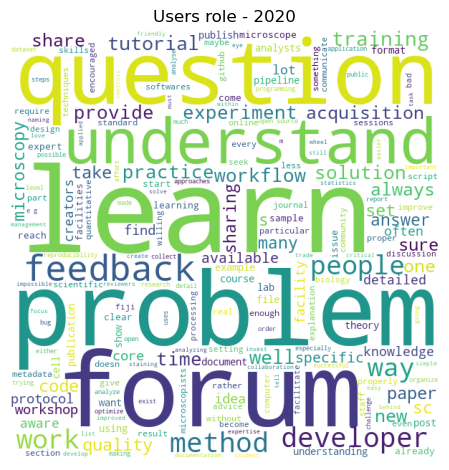

In [ ]:

# wordcloud for well solved image analysis problems_2020
from wordcloud import WordCloud, STOPWORDS
well_solved_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_image_analysis_problems_ie_finding_nuclei_tissue_analysis_analysis_of_super-resolution_data_etc_do_you_think_are_generally_well-solved.txt')
well_solved_2021 = well_solved_2021.rename(columns= {'0':'well_solved-2020'})
wordcloud(well_solved_2021["well_solved-2020"], extra_stopwords=['finding nuclei','finding', 'nuclei', 'tissue','analysis', 'analysis of super-resolution data', 'cell', 'cells', 'etc', 'image', 'images', 'well', 
             'solved', 'imaging', 'better', 'simple', 'different', 'non', 'within', 'depend', 'none', 'things', 'easy', 'many', 'almost', 'common', 
             'though', 'n', 'depends', 'number', 'made', 'seem', 'show', 'particularly', 'co', 'size', 'types', 'every', 'possible', 'based', 'generally', 'semi', 'work', 'don', 't', 'basic'])
# wordcloud for image analysis problems which need better solutions -2021
better_sol_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_image_analysis_problems_ie_finding_nuclei_tissue_analysis_analysis_of_super-resolution_data_etc_do_you_wish_had_easier_better_solutions.txt')
better_sol_2021 = better_sol_2021.rename(columns= {'0':'Image analysis problems that need better solutions-2020'})
wordcloud(better_sol_2021["Image analysis problems that need better solutions-2020"], extra_stopwords=['finding nuclei','finding', 'nuclei', 'tissue', 'analysis', 'analysis of super-resolution data', 'image', 'images', 'imaging', 'e', 'g', 
             'cell', 'em', 'non', 'etc', 'cells', 'better', 'find', 'easy', 'sample', 'well', 'don', 't', 'different', 'without','many', 'change', 'high', 'especially', 
             'low', 'good', 'tool', 'based', 'things', 'changes','within', 'problem', 'small', 'working', 'data', 
             'analyzing','set', 'often', 'easier', 'clearly', 'types', 'general', 'anything', 'co', 'work', 'highly', 'need', 'way', 're'])
# wordcloud for creators role -2020
creator_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_do_you_think_analysis_tool_CREATORS_such_as_software_developers_could_should_do_to_make_image_analysis_better_and_more_successful_How_best_could_we_encourage_them_to_do_it.txt')
creator_2021 = creator_2021.rename(columns= {'0':'Creators role - 2020'})
wordcloud(creator_2021["Creators role - 2020"],extra_stopwords=['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'image', 'don', 't', 's', 'etc', 
                 'used', 'clearly', 'doesn', 'best', 'touch', 'give', 'non', 'less', 'images', 'asap', 'high','using', 'well', 'work', 'even', 'end',
                 'others','everyone','everything','know','really','without','something','always','one','want', 'exactly', 've','m','certain', 're','instead',
                 'us','maybe','sc', 'kind','going', 'different','see','especially', 'lack','much', 'past', 'selves', 'running', 'either','require', 'happens', 'lot', 'put', 'perhaps', 
                 'properly', 'many', 'behave', 'good', 'data', 'away', 'tell', 'will'] )
# wordcloud for users role -2020
user_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_do_you_think_analysis_tool_USERS_such_as_microscopists_could_should_do_to_make_image_analysis_better_and_more_successful__How_best_could_we_encourage_them_to_do_it.txt')
user_2021 = user_2021.rename(columns= {'0':'Users role - 2020'})

wordcloud(user_2021["Users role - 2020"], extra_stopwords=['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'don', 'image', 'imaging', 'images', 
                  'data', 'think', 'best', 'need', 'encourage', 'etc', 't', 'needs', 'basic', 'able', 'keep', 'used', 'help', 'high', 'try', 'first', 'clearly',
                  'bit', 'will', 'different', 'field', 'non', 'ask', 'good', 'know'])


In [ ]:
#Comparing with the previous years data (topics of interest for the image analysis tutorials)

topic_interest_data_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_specific_topics_ie_overviews_of_a_particular_tool_comparisons_between_pieces_of_software_or_how_to_use_a_certain_tool_for_a_certain_kind_of_experiment_would_you_like_to_s.txt')
topic_interest_data_2021= topic_interest_data_2021.rename(columns={'0':'interest'})
#unigrams from 2021
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(1,1))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_interest_data_2021["interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_2021_unigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram'})
#bigrams from 2021
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_interest_data_2021["interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_2021_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
#topics of interest for the tutorials with 2021 data 
topic_interest_data_2021["Python/coding/script"] = topic_interest_data_2021["interest"].str.contains('python|coding|script', case=False)
topic_interest_data_2021["Segmentation"] = topic_interest_data_2021['interest'].str.contains('segmentation|cell segmentation', case=False)
topic_interest_data_2021["napari"] = topic_interest_data_2021['interest'].str.contains('napari', case=False)
topic_interest_data_2021["Certain tools"] = topic_interest_data_2021['interest'].str.contains('certain tool', case=False)
topic_interest_data_2021["Open source"] = topic_interest_data_2021['interest'].str.contains('open source', case=False)
topic_interest_data_2021["Deep/machine learning"] = topic_interest_data_2021['interest'].str.contains('deep|machine', case=False)
topic_interest_data_2021["Fiji/ImageJ/Macro"] = topic_interest_data_2021['interest'].str.contains('imagej|fiji|macro', case=False)
topic_interest_data_2021["Best practices"] = topic_interest_data_2021['interest'].str.contains('best practices', case=False)
topic_interest_data_2021["Cellprofiler"] = topic_interest_data_2021['interest'].str.contains('cellprofiler', case=False)
topic_interest_data_2021["Comparisons"] = topic_interest_data_2021['interest'].str.contains('comparison', case=False)

topic_data_2021 = topic_interest_data_2021.drop(columns=['interest', 'Fiji/ImageJ/macro'])
topic_data_2021_sum = topic_data_2021.sum()

#chart for the topics of interest for the future workshop
topic_data_2021_chart = px.bar(topic_data_2021_sum, labels= {'value':'counts', 'index':''}, text_auto=True)
topic_data_2021_chart.update_layout(title='Topics of interest for the image analysis tutorials', title_x=0.5, width = 500, height=500, showlegend=False)
topic_data_2021_chart.update_xaxes(categoryorder='total descending')
# Topics of interest for future tutorials - 2020 and 2022
top_20 = topic_data_2021_sum.to_frame()
top_20 = top_20.rename(columns={0:'counts'})
top_20 = top_20.reset_index()
top_20 = top_20.rename(columns={'index':'topics'})

top_22 = topic_data_sum.to_frame()
top_22 = top_22.rename(columns={0:'counts'})
top_22 = top_22.reset_index()
top_22 = top_22.rename(columns={'index':'topics'})


# bar chart
top_comp = go.Figure()

top_comp.add_trace(go.Bar(name='2020',x=top_20['topics'], y=top_20['counts'], text=top_20['counts']))
top_comp.add_trace(go.Bar(name='2022', x=top_22['topics'], y=top_22['counts'], text=top_22['counts']))

top_comp.update_layout(title='Topics of interest for the image analysis tutorials', title_x=0.5, width = 500, height=500, font=dict(family='Helvetica', color="Black", size=16))
top_comp.update_xaxes(categoryorder='total descending')
#Conf-2020

conf_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\Please_select_any_of_the_following_you_have_attended_in_the_past.txt')
conf_20= conf_20.rename(columns={'0':'conf'})
conf_20
conf_20 = conf_20.dropna()
conf_20['Workshop'] = conf_20['conf'].apply(lambda x: True if 'Workshop' in x else False)
conf_20['Conference session'] = conf_20['conf'].apply(lambda x: True if 'session' in x else False)
conf_20['Conference'] = conf_20['conf'].apply(lambda x: True if 'dedicated' in x else False)


conf_20 = conf_20.iloc[:, 1:4]
conf_tot = conf_20.sum()
conf_tot = conf_tot.to_frame()
conf_tot
conf_tot = conf_tot.rename(columns={0:'counts'})
conf_tot = conf_tot.reset_index()
conf_tot = conf_tot.rename(columns={'index':'topics'})

pre_df_tot = pre_df_tot.rename(columns={0:'counts'})
pre_df_tot = pre_df_tot.reset_index()
pre_df_tot = pre_df_tot.rename(columns={'index':'topics'})
pre_df_tot
pre_con_20_22 = go.Figure()

pre_con_20_22.add_trace(go.Bar(name='2020', x=conf_tot['topics'], y=conf_tot['counts'], text=conf_tot['counts']))
pre_con_20_22.add_trace(go.Bar(name='2022', x=pre_df_tot['topics'], y=pre_df_tot['counts'], text=pre_df_tot['counts']))

pre_con_20_22.update_layout(width = 500, height=500, font=dict(family='Helvetica', color="Black", size=16))
pre_con_20_22.update_xaxes(categoryorder='total descending')


NameError: name 'stoplist' is not defined

In [ ]:
#Are there any image analysis workshops, tutorials, or conferences that you have participated in and found particularly helpful? If yes, what made them beneficial?
work_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\Are_there_any_image_analysis_workshops_tutorials_or_conferences_that_you_have_participated_in_and_found_particularly_helpful__If_yes_what_made_them_beneficial.txt')
work_20= work_20.rename(columns={'0':'work'})
work_20 = work_20['work'].str.lower().str.strip()
work_20 = pd.DataFrame(work_20)
work_20


work_20["NEUBIAS"] = work_20['work'].apply(lambda x: True if 'neubias' in x else False)
work_20["Fiji/ImageJ"] = work_20['work'].apply(lambda x: True if ('imagej' in x) or ('fiji' in x) else False)
work_20["Cellprofiler"] = work_20['work'].apply(lambda x: True if 'cellprofiler' in x else False)
work_20["Imaris"] = work_20['work'].apply(lambda x: True if 'imaris' in x else False)
work_20["Robert Hasse"] = work_20['work'].apply(lambda x: True if 'robert' in x else False)
work_20["AQLM"] = work_20['work'].apply(lambda x: True if 'aqlm' in x else False)
work_20["CSHL"] = work_20['work'].apply(lambda x: True if 'cshl' in x else False)
work_20["I2K"] = work_20['work'].apply(lambda x: True if 'i2k' in x else False)
work_20["EMBL"] = work_20['work'].apply(lambda x: True if 'embl' in x else False)
work_20

work_20_sum = work_20.sum().to_frame()
work_20_sum = work_20_sum.drop('work')
work_20_sum = work_20_sum.rename(columns={0:'counts'})
work_20_sum = work_20_sum.reset_index()
work_20_sum = work_20_sum.rename(columns={'index':'conferences'})
work_20_sum

#altering 2022 dataframe 
workshops_for_chart = workshops_for_chart.rename(columns={0:'counts'})
workshops_for_chart = workshops_for_chart.reset_index()
workshops_for_chart = workshops_for_chart.rename(columns={'index':'conferences'})
workshops_for_chart
#comparison chart 
work_20_22 = go.Figure()

work_20_22.add_trace(go.Bar(name='2020', x=work_20_sum['conferences'], y=work_20_sum['counts'], text=work_20_sum['counts']))
work_20_22.add_trace(go.Bar(name='2022', x=workshops_for_chart['conferences'], y=workshops_for_chart['counts'], text=workshops_for_chart['counts']))

work_20_22.update_layout(title_x=0.5, title='Workshops attended by the participants', width=500, height=500, font=dict(family='Helvetica', color="Black", size=16))
work_20_22.update_xaxes(categoryorder = 'total descending')

#image analysis addition for the conferences - 2020

ia_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\Are_there_any_conferences_you_ve_attended_in_the_past_that_you_think_would_particularly_benefit_from_the_addition_expansion_of_image_analysis_offerings.txt')
ia_20= ia_20.rename(columns={'0':'ia'})
ia_20 = ia_20['ia'].str.lower().str.strip()
ia_20 = pd.DataFrame(ia_20)
ia_20
# Creating a dataframe of unigrams 
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(1,1))
# matrix of ngrams
ngrams = c_vec.fit_transform(ia_20['ia'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
ia_unigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram'})
# Creating a dataframe of bigrams 
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(ia_20['ia'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
ia_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
# Creating a dataframe of trigrams 
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(ia_20['ia'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
ia_trigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})
data_df_20 = [['ASCB', 29], ['ELMI', 7], ['ABRF', 0], ['NEUBIAS', 8], ['MMC', 5], ['Biophysical society', 9], ['Developmental biology conference', 2]]
conf_df_20 = pd.DataFrame(data_df_20, columns=['Conferences', 'Counts'])


#chart for the conferences that need more image analysis sessions
ia_20_22 = go.Figure()

ia_20_22.add_trace(go.Bar(name='2020', x=conf_df_20['Conferences'], y=conf_df_20['Counts'], text=conf_df_20['Counts']))
ia_20_22.add_trace(go.Bar(name='2022', x=conf_df['Conferences'], y=conf_df['Counts'], text=conf_df['Counts'] ))
ia_20_22.update_layout(width=500, height=600, font=dict(family='Helvetica', color="Black", size=16))
ia_20_22.update_xaxes(categoryorder='total descending')


In [ ]:
# wordcloud for creators role -2020
creator_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_do_you_think_analysis_tool_CREATORS_such_as_software_developers_could_should_do_to_make_image_analysis_better_and_more_successful_How_best_could_we_encourage_them_to_do_it.txt')
creator_2021 = creator_2021.rename(columns= {'0':'Creators role - 2020'})
wordcloud(creator_2021["Creators role - 2020"],extra_stopwords=['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'image', 'don', 't', 's', 'etc', 
                 'used', 'clearly', 'doesn', 'best', 'touch', 'give', 'non', 'less', 'images', 'asap', 'high','using', 'well', 'work', 'even', 'end',
                 'others','everyone','everything','know','really','without','something','always','one','want', 'exactly', 've','m','certain', 're','instead',
                 'us','maybe','sc', 'kind','going', 'different','see','especially', 'lack','much', 'past', 'selves', 'running', 'either','require', 'happens', 'lot', 'put', 'perhaps', 
                 'properly', 'many', 'behave', 'good', 'data', 'away', 'tell', 'will'] )
# wordcloud for users role -2020
user_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_do_you_think_analysis_tool_USERS_such_as_microscopists_could_should_do_to_make_image_analysis_better_and_more_successful__How_best_could_we_encourage_them_to_do_it.txt')
user_2021 = user_2021.rename(columns= {'0':'Users role - 2020'})

wordcloud(user_2021["Users role - 2020"], extra_stopwords=['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'don', 'image', 'imaging', 'images', 
                  'data', 'think', 'best', 'need', 'encourage', 'etc', 't', 'needs', 'basic', 'able', 'keep', 'used', 'help', 'high', 'try', 'first', 'clearly',
                  'bit', 'will', 'different', 'field', 'non', 'ask', 'good', 'know'])
#Comparing with the previous years data (topics of interest for the image analysis tutorials)

topic_interest_data_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_specific_topics_ie_overviews_of_a_particular_tool_comparisons_between_pieces_of_software_or_how_to_use_a_certain_tool_for_a_certain_kind_of_experiment_would_you_like_to_s.txt')
topic_interest_data_2021= topic_interest_data_2021.rename(columns={'0':'interest'})
#unigrams from 2021
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(1,1))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_interest_data_2021["interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_2021_unigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram'})
#bigrams from 2021
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_interest_data_2021["interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_2021_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
#topics of interest for the tutorials with 2021 data 
topic_interest_data_2021["Python/coding/script"] = topic_interest_data_2021["interest"].str.contains('python|coding|script', case=False)
topic_interest_data_2021["Segmentation"] = topic_interest_data_2021['interest'].str.contains('segmentation|cell segmentation', case=False)
topic_interest_data_2021["napari"] = topic_interest_data_2021['interest'].str.contains('napari', case=False)
topic_interest_data_2021["Certain tools"] = topic_interest_data_2021['interest'].str.contains('certain tool', case=False)
topic_interest_data_2021["Open source"] = topic_interest_data_2021['interest'].str.contains('open source', case=False)
topic_interest_data_2021["Deep/machine learning"] = topic_interest_data_2021['interest'].str.contains('deep|machine', case=False)
topic_interest_data_2021["Fiji/ImageJ/Macro"] = topic_interest_data_2021['interest'].str.contains('imagej|fiji|macro', case=False)
topic_interest_data_2021["Best practices"] = topic_interest_data_2021['interest'].str.contains('best practices', case=False)
topic_interest_data_2021["Cellprofiler"] = topic_interest_data_2021['interest'].str.contains('cellprofiler', case=False)
topic_interest_data_2021["Comparisons"] = topic_interest_data_2021['interest'].str.contains('comparison', case=False)

topic_data_2021 = topic_interest_data_2021.drop(columns=['interest', 'Fiji/ImageJ/macro'])
topic_data_2021_sum = topic_data_2021.sum()

#chart for the topics of interest for the future workshop
topic_data_2021_chart = px.bar(topic_data_2021_sum, labels= {'value':'counts', 'index':''}, text_auto=True)
topic_data_2021_chart.update_layout(title='Topics of interest for the image analysis tutorials', title_x=0.5, width = 500, height=500, showlegend=False)
topic_data_2021_chart.update_xaxes(categoryorder='total descending')
# Topics of interest for future tutorials - 2020 and 2022
top_20 = topic_data_2021_sum.to_frame()
top_20 = top_20.rename(columns={0:'counts'})
top_20 = top_20.reset_index()
top_20 = top_20.rename(columns={'index':'topics'})

top_22 = topic_data_sum.to_frame()
top_22 = top_22.rename(columns={0:'counts'})
top_22 = top_22.reset_index()
top_22 = top_22.rename(columns={'index':'topics'})


# bar chart
top_comp = go.Figure()

top_comp.add_trace(go.Bar(name='2020',x=top_20['topics'], y=top_20['counts'], text=top_20['counts']))
top_comp.add_trace(go.Bar(name='2022', x=top_22['topics'], y=top_22['counts'], text=top_22['counts']))

top_comp.update_layout(title='Topics of interest for the image analysis tutorials', title_x=0.5, width = 500, height=500, font=dict(family='Helvetica', color="Black", size=16))
top_comp.update_xaxes(categoryorder='total descending')
#Conf-2020

conf_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\Please_select_any_of_the_following_you_have_attended_in_the_past.txt')
conf_20= conf_20.rename(columns={'0':'conf'})
conf_20
conf_20 = conf_20.dropna()
conf_20['Workshop'] = conf_20['conf'].apply(lambda x: True if 'Workshop' in x else False)
conf_20['Conference session'] = conf_20['conf'].apply(lambda x: True if 'session' in x else False)
conf_20['Conference'] = conf_20['conf'].apply(lambda x: True if 'dedicated' in x else False)


conf_20 = conf_20.iloc[:, 1:4]
conf_tot = conf_20.sum()
conf_tot = conf_tot.to_frame()
conf_tot
conf_tot = conf_tot.rename(columns={0:'counts'})
conf_tot = conf_tot.reset_index()
conf_tot = conf_tot.rename(columns={'index':'topics'})

pre_df_tot = pre_df_tot.rename(columns={0:'counts'})
pre_df_tot = pre_df_tot.reset_index()
pre_df_tot = pre_df_tot.rename(columns={'index':'topics'})
pre_df_tot
pre_con_20_22 = go.Figure()

pre_con_20_22.add_trace(go.Bar(name='2020', x=conf_tot['topics'], y=conf_tot['counts'], text=conf_tot['counts']))
pre_con_20_22.add_trace(go.Bar(name='2022', x=pre_df_tot['topics'], y=pre_df_tot['counts'], text=pre_df_tot['counts']))

pre_con_20_22.update_layout(width = 500, height=500, font=dict(family='Helvetica', color="Black", size=16))
pre_con_20_22.update_xaxes(categoryorder='total descending')
#Are there any image analysis workshops, tutorials, or conferences that you have participated in and found particularly helpful? If yes, what made them beneficial?
work_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\Are_there_any_image_analysis_workshops_tutorials_or_conferences_that_you_have_participated_in_and_found_particularly_helpful__If_yes_what_made_them_beneficial.txt')
work_20= work_20.rename(columns={'0':'work'})
work_20 = work_20['work'].str.lower().str.strip()
work_20 = pd.DataFrame(work_20)
work_20


work_20["NEUBIAS"] = work_20['work'].apply(lambda x: True if 'neubias' in x else False)
work_20["Fiji/ImageJ"] = work_20['work'].apply(lambda x: True if ('imagej' in x) or ('fiji' in x) else False)
work_20["Cellprofiler"] = work_20['work'].apply(lambda x: True if 'cellprofiler' in x else False)
work_20["Imaris"] = work_20['work'].apply(lambda x: True if 'imaris' in x else False)
work_20["Robert Haase"] = work_20['work'].apply(lambda x: True if 'robert' in x else False)
work_20["AQLM"] = work_20['work'].apply(lambda x: True if 'aqlm' in x else False)
work_20["CSHL"] = work_20['work'].apply(lambda x: True if 'cshl' in x else False)
work_20["I2K"] = work_20['work'].apply(lambda x: True if 'i2k' in x else False)
work_20["EMBL"] = work_20['work'].apply(lambda x: True if 'embl' in x else False)
work_20

work_20_sum = work_20.sum().to_frame()
work_20_sum = work_20_sum.drop('work')
work_20_sum = work_20_sum.rename(columns={0:'counts'})
work_20_sum = work_20_sum.reset_index()
work_20_sum = work_20_sum.rename(columns={'index':'conferences'})
work_20_sum

#altering 2022 dataframe 
workshops_for_chart = workshops_for_chart.rename(columns={0:'counts'})
workshops_for_chart = workshops_for_chart.reset_index()
workshops_for_chart = workshops_for_chart.rename(columns={'index':'conferences'})
workshops_for_chart
#comparison chart 
work_20_22 = go.Figure()

work_20_22.add_trace(go.Bar(name='2020', x=work_20_sum['conferences'], y=work_20_sum['counts'], text=work_20_sum['counts']))
work_20_22.add_trace(go.Bar(name='2022', x=workshops_for_chart['conferences'], y=workshops_for_chart['counts'], text=workshops_for_chart['counts']))

work_20_22.update_layout(title_x=0.5, title='Workshops attended by the participants', width=500, height=500, font=dict(family='Helvetica', color="Black", size=16))
work_20_22.update_xaxes(categoryorder = 'total descending')

#image analysis addition for the conferences - 2020

ia_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\Are_there_any_conferences_you_ve_attended_in_the_past_that_you_think_would_particularly_benefit_from_the_addition_expansion_of_image_analysis_offerings.txt')
ia_20= ia_20.rename(columns={'0':'ia'})
ia_20 = ia_20['ia'].str.lower().str.strip()
ia_20 = pd.DataFrame(ia_20)
ia_20
# Creating a dataframe of unigrams 
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(1,1))
# matrix of ngrams
ngrams = c_vec.fit_transform(ia_20['ia'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
ia_unigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram'})
# Creating a dataframe of bigrams 
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(ia_20['ia'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
ia_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
# Creating a dataframe of trigrams 
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(ia_20['ia'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
ia_trigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})
data_df_20 = [['ASCB', 29], ['ELMI', 7], ['ABRF', 0], ['NEUBIAS', 8], ['MMC', 5], ['Biophysical society', 9], ['Developmental biology conference', 2]]
conf_df_20 = pd.DataFrame(data_df_20, columns=['Conferences', 'Counts'])


#chart for the conferences that need more image analysis sessions
ia_20_22 = go.Figure()

ia_20_22.add_trace(go.Bar(name='2020', x=conf_df_20['Conferences'], y=conf_df_20['Counts'], text=conf_df_20['Counts']))
ia_20_22.add_trace(go.Bar(name='2022', x=conf_df['Conferences'], y=conf_df['Counts'], text=conf_df['Counts'] ))
ia_20_22.update_layout(width=500, height=600, font=dict(family='Helvetica', color="Black", size=16))
ia_20_22.update_xaxes(categoryorder='total descending')